In [1]:
import pandas as pd
import yaml
df = pd.read_csv(r'C:\Users\User\Desktop\IronHack\Week_7\Day1\ML-Project\data\raw\healthcare-dataset-stroke-data.csv')

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

## EDA

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Fill NA values

In [6]:
average_bmi = df['bmi'].mean()

df["bmi"] = df["bmi"].fillna(average_bmi)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [7]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df = df.drop("id", axis=1)

In [9]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Creating df with numerical columns

In [10]:
df_num = df.select_dtypes(include=['number'])

## Correlation plot

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

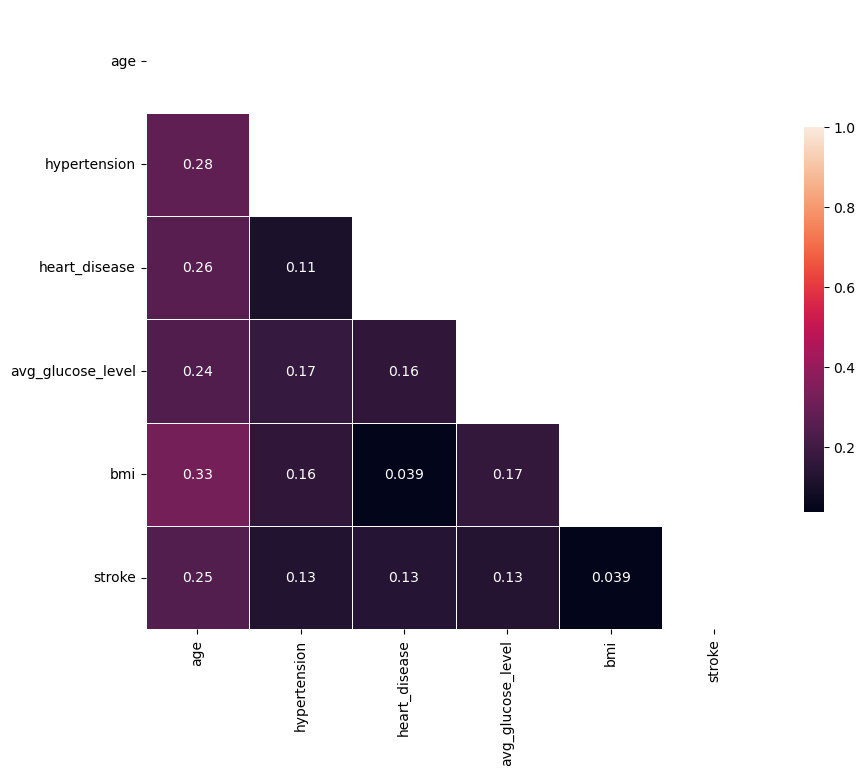

In [11]:
corr=np.abs(df_num.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

## Train Test Split

In [12]:
features = df.drop(columns = ["stroke"])
target = df["stroke"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.20, random_state=0)

In [14]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3029,Female,36.0,0,0,Yes,Private,Rural,67.29,36.7,formerly smoked
2277,Female,34.0,0,0,Yes,Private,Rural,83.53,48.5,formerly smoked
3002,Male,60.0,0,0,Yes,Private,Rural,65.16,30.8,never smoked
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked
2825,Male,76.0,0,0,Yes,Private,Urban,58.65,25.6,smokes
...,...,...,...,...,...,...,...,...,...,...
4931,Female,53.0,1,0,Yes,Govt_job,Rural,98.61,38.8,smokes
3264,Female,61.0,0,0,Yes,Private,Rural,72.01,26.0,formerly smoked
1653,Male,44.0,0,0,Yes,Private,Rural,94.71,28.4,smokes
2607,Male,21.0,0,0,No,Private,Urban,120.94,29.7,formerly smoked


In [15]:
X_test.shape

(1022, 10)

In [23]:
y_train

3029    0
2277    0
3002    0
246     1
2825    0
       ..
4931    0
3264    0
1653    0
2607    0
2732    0
Name: stroke, Length: 4088, dtype: int64

## DF number 

In [28]:
X_test_num  = X_test.select_dtypes(include=['number'])
X_test_num

,age,hypertension,heart_disease,avg_glucose_level,bmi
42,82.0,0,1,144.90,26.400000
380,4.0,0,0,106.22,16.700000
3524,58.0,0,0,79.95,25.900000
352,20.0,0,0,96.57,34.100000
4927,10.0,0,0,69.84,13.700000
...,...,...,...,...,...
472,43.0,0,0,75.05,22.900000
4446,42.0,0,0,191.94,27.900000
660,52.0,0,0,69.37,36.200000
57,78.0,0,0,237.75,28.893237


In [17]:
X_train_num  = X_train.select_dtypes(include=['number'])
X_train_num.shape

(4088, 5)

## Normalize Stand. 

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_num, y_train)

print(f"The value of R2 on the TEST set is: {knn.score(X_test_num, y_test): .2f}")

The value of R2 on the TEST set is:  0.95


In [27]:
scaler = StandardScaler()

scaler.fit(X_train_num)

X_train_scaled_np = scaler.transform(X_train_num)
X_test_scaled_np  = scaler.transform(X_test_num)

X_train_standarized = pd.DataFrame(X_train_scaled_np, columns=X_train_num.columns, index=X_train_num.index)
X_test_standarized  = pd.DataFrame(X_test_scaled_np, columns=X_test_num.columns, index=X_test_num.index)

knn.fit(X_train_standarized, y_train)

y_train_pred = knn.predict(X_train_standarized)
y_test_pred = knn.predict(X_test_standarized)



The new R2 is  0.95


In [31]:
knn.fit(X_train_num, y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
pred = knn.predict(X_test_num)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
y_test.values

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [35]:
print(f"The accuracy of the model is {knn.score(X_test_num, y_test)*100: .2f}%")

The accuracy of the model is  94.72%


## Avaluate metrics. Accuracy, recall, f1-score.

In [36]:
from sklearn.metrics import classification_report
target_names = ['Stroke 0','Stroke 1']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

    Stroke 0       0.95      1.00      0.97       968
    Stroke 1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train_num, y_train)

RandomForestClassifier(class_weight='balanced')

In [40]:
pred_clf = clf.predict(X_test_num)
pred_clf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
y_test.values

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [42]:
print(f"The accuracy of the model is {clf.score(X_test_num, y_test)*100: .2f}%")

The accuracy of the model is  94.81%


In [43]:
from sklearn.metrics import classification_report
target_names = ['Stroke 0','Stroke 1']
print(classification_report(y_test, pred_clf, target_names=target_names))

              precision    recall  f1-score   support

    Stroke 0       0.95      1.00      0.97       968
    Stroke 1       0.67      0.04      0.07        54

    accuracy                           0.95      1022
   macro avg       0.81      0.52      0.52      1022
weighted avg       0.93      0.95      0.93      1022



## Ajusting treshhold = 0.3

In [44]:
probabilities = clf.predict_proba(X_test_num)[:, 1]
new_threshold = 0.3 
new_predictions = (probabilities >= new_threshold).astype(int)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, new_predictions, target_names=target_names))

              precision    recall  f1-score   support

    Stroke 0       0.95      0.98      0.97       968
    Stroke 1       0.26      0.11      0.16        54

    accuracy                           0.94      1022
   macro avg       0.61      0.55      0.56      1022
weighted avg       0.92      0.94      0.92      1022



## Ajusting treshhold = 0.15

In [54]:
probabilities = clf.predict_proba(X_test_num)[:, 1]
new_threshold1 = 0.15
new_predictions1 = (probabilities >= new_threshold1).astype(int)
print(classification_report(y_test, new_predictions1, target_names=target_names))

              precision    recall  f1-score   support

    Stroke 0       0.96      0.92      0.94       968
    Stroke 1       0.18      0.30      0.22        54

    accuracy                           0.89      1022
   macro avg       0.57      0.61      0.58      1022
weighted avg       0.92      0.89      0.90      1022



## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [75]:
tree = DecisionTreeClassifier(max_depth=10)

In [76]:
tree.fit(X_train_standarized, y_train)

DecisionTreeClassifier(max_depth=10)

In [77]:
y_pred_test_dt = tree.predict(X_test_standarized)

print(f"MAE, {mean_absolute_error(y_pred_test_dt, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_dt, y_test): .2f}")
print(f"R2 score, {tree.score(X_test_standarized, y_test): .2f}")

MAE,  0.07
MSE,  0.07
RMSE,  0.27
R2 score,  0.93


In [78]:
tree_importance = {feature : importance for feature, importance in zip(X_train_standarized.columns, tree.feature_importances_)}
tree_importance

{'age': 0.2996316015959672,
 'hypertension': 0.04846745856695469,
 'heart_disease': 0.017366598604441785,
 'avg_glucose_level': 0.33348129863186216,
 'bmi': 0.30105304260077415}

In [79]:
from sklearn.tree import export_text

tree_viz = export_text(tree, feature_names=list(X_train_standarized.columns))
print(tree_viz)

|--- age <= 1.06
|   |--- age <= 0.27
|   |   |--- age <= -0.26
|   |   |   |--- age <= -0.53
|   |   |   |   |--- class: 0
|   |   |   |--- age >  -0.53
|   |   |   |   |--- age <= -0.48
|   |   |   |   |   |--- avg_glucose_level <= -0.65
|   |   |   |   |   |   |--- avg_glucose_level <= -0.68
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- avg_glucose_level >  -0.68
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- avg_glucose_level >  -0.65
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  -0.48
|   |   |   |   |   |--- class: 0
|   |   |--- age >  -0.26
|   |   |   |--- age <= -0.17
|   |   |   |   |--- bmi <= 0.10
|   |   |   |   |   |--- bmi <= 0.07
|   |   |   |   |   |   |--- bmi <= -0.01
|   |   |   |   |   |   |   |--- avg_glucose_level <= -0.51
|   |   |   |   |   |   |   |   |--- avg_glucose_level <= -0.56
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- avg_glucose_level >  -0.56


## Accuracy of the model:

In [80]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred_test_dt): .2f}")

Accuracy:  0.93


## Confusion matrix:

In [82]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test_dt))

Confusion Matrix:
[[946  22]
 [ 50   4]]


## ROC AUC

In [84]:
from sklearn.metrics import roc_auc_score
y_pred_proba = tree.predict_proba(X_test_standarized)[:, 1]
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba): .2f}")

ROC AUC:  0.58
